# 주성분 분석

**[데이터 준비]**

> 1) 2008 미국 LPGA 선수 경기력, 상금, 출전 회수 데이터

In [113]:
import pandas as pd
lpga=pd.read_csv('http://wolfpack.hnu.ac.kr/Stat_Notes/example_data/lpga2008.csv')
lpga.columns=['golfer','drive','fairway','green','putting','sand_no','sand_save','money','play_no'] 
lpga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
golfer       157 non-null object
drive        157 non-null float64
fairway      157 non-null float64
green        157 non-null float64
putting      157 non-null float64
sand_no      157 non-null float64
sand_save    157 non-null float64
money        157 non-null int64
play_no      157 non-null int64
dtypes: float64(6), int64(2), object(1)
memory usage: 11.1+ KB


> 2) 데이터 조작

>> 골퍼 선수 이름 행 인덱스 만들기

>> inplace=True : 행인덱스를 바로 적용하라는 의미



In [114]:
lpga['Name']=lpga['golfer'].str.split(',',n=1, expand=True)[0]
lpga.set_index('Name',inplace=True)
lpga.head(3)

golfer  drive  fairway  ...  sand_save  money  play_no
Name                                            ...                           
Ahn              Ahn, Shi Hyun  249.4     64.6  ...       34.5   6063       50
Alfredsson   Alfredsson, Helen  253.8     62.7  ...       38.8  19343       74
Ammaccapane  Ammaccapane, Dina  246.3     70.2  ...       40.5   1873       50

[3 rows x 9 columns]

**[경기력 변수 설정 (6개) 상관분석]**

>비거리-장타력(힘)측정변수(+)

>페어웨이안착율-드라이버정확도(+) 

>그린적중률-아이언실정확도(+)

>샌드회수-부정확도측정(-)

>샌드세이브-위기탈출능력(+)

>퍼팅개수-퍼팅능력(-)

>> 변수 명 옆에 부호는 선수의 경기력과의 상관계수 부호임

In [116]:
lpga_ds=lpga.iloc[:,1:7]
lpga_ds.head(3)

drive  fairway  green  putting  sand_no  sand_save
Name                                                           
Ahn          249.4     64.6   61.2    27.44     1.10       34.5
Alfredsson   253.8     62.7   68.2    29.36     0.66       38.8
Ammaccapane  246.3     70.2   64.6    30.20     0.74       40.5

**[상관분석]**
> 상관계수 행렬 출력

In [86]:
lpga_cor=lpga_ds.corr()
lpga_cor

drive   fairway     green   putting   sand_no  sand_save
drive      1.000000 -0.420938  0.491466 -0.187990 -0.135211  -0.054246
fairway   -0.420938  1.000000  0.309193  0.169564 -0.272891   0.100932
green      0.491466  0.309193  1.000000  0.018413 -0.568446   0.016672
putting   -0.187990  0.169564  0.018413  1.000000  0.168191  -0.180729
sand_no   -0.135211 -0.272891 -0.568446  0.168191  1.000000   0.064363
sand_save -0.054246  0.100932  0.016672 -0.180729  0.064363   1.000000

In [87]:
lpga_cor.style.background_gradient(cmap='coolwarm').set_precision(3)

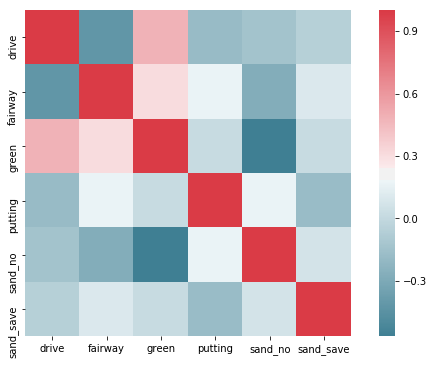

In [88]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(lpga_cor, mask=np.zeros_like(lpga_cor, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Text(0.5, 1.0, 'Correlation matrix')

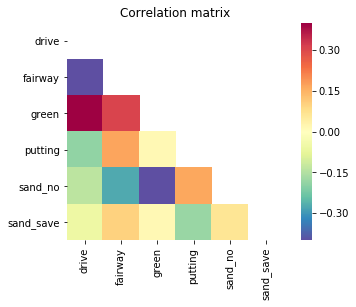

In [89]:
mask = np.zeros_like(lpga_cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(lpga_cor, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

> 산점도 행렬

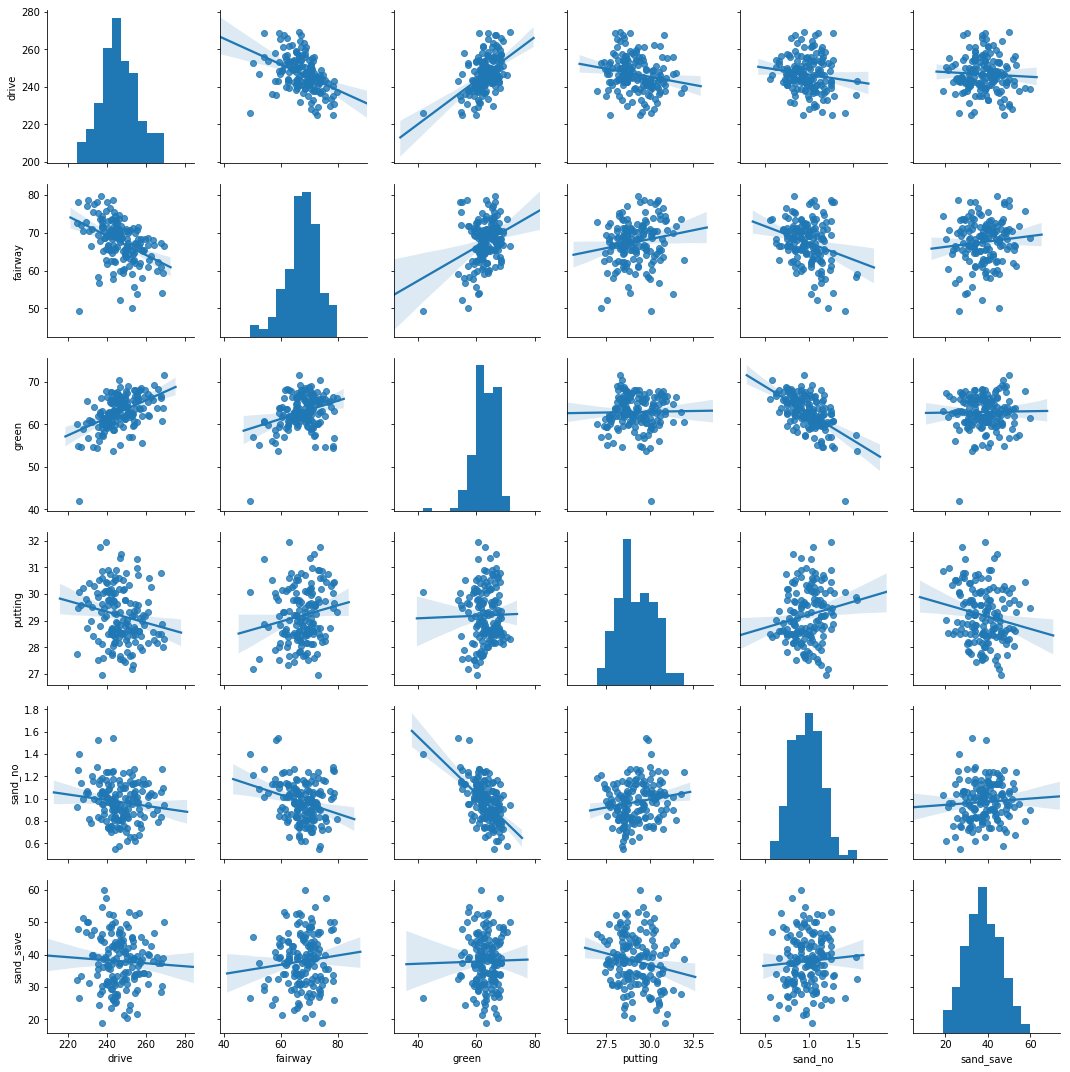

In [90]:
import seaborn as sns
sns.pairplot(lpga_ds,kind='reg')

**[주성분 구하기]**
> 변수의 단위는 공분산 행렬(고유치 구하는 대상)에 영향을 미치므로 단위의 표준화가 필요함

> 표준화 결과는 데이터프레임이 아닌 numpy array이다. 행렬 계산 가능

> lpga_s는 행은 선수의 수이고, 열은 원 변수의 표준화 결과로 각 변수의 평균은 0이고 표준편차는 1이다.

>>[*] 고유치, 고유벡터 계산 : 상관계수 행렬 이용

In [117]:
import numpy as np
from scipy import linalg as LA
R=np.array(lpga_cor)    # convert data frame into np array
evals,evecs = LA.eig(R) #calculate eigen values & vectors
print(evals,'\n eigen vectors',evecs)

[1.87795135+0.j 0.15370758+0.j 1.53519219+0.j 0.43463014+0.j
 0.83616231+0.j 1.16235643+0.j] 
 eigen vectors [[ 0.39975916 -0.57669906  0.5793062  -0.2121922   0.32099987 -0.15475365]
 [ 0.19523174 -0.42096839 -0.70654334 -0.52026017 -0.00979766  0.12124377]
 [ 0.66578713  0.64891553 -0.07056682 -0.20821986  0.2775736  -0.10126124]
 [-0.14477905 -0.11316769 -0.35862226  0.37376702  0.58261661 -0.59873055]
 [-0.5812382   0.23363429  0.16982566 -0.65343314  0.38792043 -0.03576712]
 [-0.0024199  -0.04147932 -0.05263538  0.27252827  0.57436191  0.76898625]]


In [118]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
lpga_s=StandardScaler().fit_transform(lpga_ds) 
print(type(lpga_s),lpga_s.shape)

<class 'numpy.ndarray'> (157, 6)


In [119]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4) #80% rule pca=PCA(0.8)
lpga_pca=pca.fit_transform(lpga_s) #PC variables
lpga_pca[:3]

array([[ 0.45181825,  1.31677005, -0.60221069,  0.97600909],
       [-2.01474762,  0.58154419,  0.3075384 , -0.09412126],
       [-0.96582636, -0.96322842,  0.27668786, -0.34161888]])

In [120]:
pca.explained_variance_ratio_  #explained ratio

array([0.31299189, 0.25586536, 0.19372607, 0.13936039])

In [95]:
sum(pca.explained_variance_ratio_ ) #cumulative of expalined ratio 

0.9019437133221455

In [121]:
lpga_loading=pd.DataFrame(pca.components_.T,columns=['파온(-)','장타(+)','위기관리(-)','PC4'])  #loading values
lpga_loading.set_index(lpga_cor.index,inplace=True)
lpga_loading

파온(-)     장타(+)   위기관리(-)       PC4
drive     -0.399759  0.579306  0.154754 -0.321000
fairway   -0.195232 -0.706543 -0.121244  0.009798
green     -0.665787 -0.070567  0.101261 -0.277574
putting    0.144779 -0.358622  0.598731 -0.582617
sand_no    0.581238  0.169826  0.035767 -0.387920
sand_save  0.002420 -0.052635 -0.768986 -0.574362

**[주성분 산점도 그리기]**

>> 주성분 변수 이름 부여, 골퍼 이름을 행 인덱스로 만들었다가 컬럼 변수로 만들어 산점도 그리기 준비

In [159]:
lpga_pca_df=pd.DataFrame(lpga_pca,columns=['파온(-)','장타(+)','위기관리(-)','PC4'])
lpga_pca_df.set_index(lpga_ds.index,inplace=True)
lpga_pca_plt=lpga_pca_df.reset_index()
lpga_pca_plt.head(3)

Name     파온(-)     장타(+)   위기관리(-)       PC4
0          Ahn  0.451818  1.316770 -0.602211  0.976009
1   Alfredsson -2.014748  0.581544  0.307538 -0.094121
2  Ammaccapane -0.965826 -0.963228  0.276688 -0.341619

In [160]:
import plotly.express as px
fig = px.scatter(lpga_pca_plt,x="파온(-)",y="장타(+)",text="Name")
fig.update_traces(textposition='top center')
fig.update_layout(
  height=800,
  title_text='GDP and Life Expectancy (Americas, 2007)'
)
fig.show()

장타자 : Lincicome, Davis, Gutafson

파온 능력 : Creamer, Ochoa

**[주성분 활용하기]**
> 원데이터+주성분 결과 합치기

In [163]:
lpga_pca_all=pd.concat([lpga,lpga_pca_df],axis=1)
lpga_pca_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Ahn to Yoo
Data columns (total 13 columns):
golfer       157 non-null object
drive        157 non-null float64
fairway      157 non-null float64
green        157 non-null float64
putting      157 non-null float64
sand_no      157 non-null float64
sand_save    157 non-null float64
money        157 non-null int64
play_no      157 non-null int64
파온(-)        157 non-null float64
장타(+)        157 non-null float64
위기관리(-)      157 non-null float64
PC4          157 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 22.2+ KB


> 주성분 점수에 활용 각 분야 우수 선수 5명 출력

>

In [166]:
lpga_pca_all.sort_values(by='파온(-)').head(5)

golfer  drive  fairway  ...     장타(+)   위기관리(-)       PC4
Name                                     ...                              
Creamer  Creamer, Paula  246.3     73.6  ... -1.049189 -1.354845  0.161178
Ochoa     Ochoa, Lorena  269.3     66.4  ...  1.580993 -1.038730 -1.663548
Choi      Choi, Na Yeon  257.4     68.5  ...  0.441918 -0.903611 -0.350642
Tseng       Tseng, Yani  266.1     62.3  ...  1.815389  0.195912 -0.219849
Yoo      Yoo, Sun Young  254.3     67.2  ...  0.400680  0.092011  0.953432

[5 rows x 13 columns]

In [168]:
lpga_pca_all.sort_values(by='장타(+)',ascending=False).head(5)

golfer  drive  fairway  ...     장타(+)   위기관리(-)       PC4
Name                                            ...                              
Davies           Davies, Laura  252.8     50.2  ...  3.490813 -1.493059  0.268819
Lincicome  Lincicome, Brittany  268.5     54.1  ...  3.478670  1.188690 -0.552631
Gustafson    Gustafson, Sophie  268.8     59.3  ...  2.886654 -0.174833 -0.507671
McKay            McKay, Mhairi  246.9     52.2  ...  2.723089 -0.753762  1.209962
Park               Park, Grace  258.1     58.1  ...  2.577784 -0.796979  0.283864

[5 rows x 13 columns]

> 회귀분석

In [181]:
import statsmodels.api as sm
y=lpga_pca_all['money']
X=sm.add_constant(lpga_pca_all[['파온(-)','장타(+)','위기관리(-)','PC4']])
model=sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  money   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     33.61
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.48e-20
Time:                        05:17:48   Log-Likelihood:                -1524.4
No. Observations:                 157   AIC:                             3059.
Df Residuals:                     152   BIC:                             3074.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4863.8854    323.265     15.046      0.000    4225.213    5502.557
파온(-)      -2233.2254    235.894     -9.467      0.000   -2699.279   -1767.172
장타(+)        959.8501    260.902      3.679      0.000     444.388    1475.312
위기관리(-)    -1672.3524    299.839     -5.577      0.000   -2264.743   -1079.962
PC4         -142.2827    353.519     -0.402      0.688    -840.728     556.163
==============================================================================
Omnibus:                      110.976   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1071.075
Skew:                           2.458   Prob(JB):                    2.62e-233
Kurtosis:                      14.814   Cond. No.                         1.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
model.predict(X) #prediction

Name
Ahn               5987.014409
Alfredsson        9420.545325
Ammaccapane       5682.125306
Bader             3292.898744
Bae               5714.380064
Baena             2518.100105
Bastel           -1459.552360
Blasberg          5258.894983
Blomqvist         7537.203928
Bowie Young       6359.088301
Bunch             3334.498265
Burks             1448.824775
Burton            2585.141196
Castrale          5830.030396
Cavalleri          575.288911
Cho               5713.997976
Choi              5471.372751
Choi             11944.731384
Chung             4049.754463
Coutu             4405.027497
Creamer          12461.299013
Dahllof           1254.731170
D'Alessio         3698.483253
Daly-Donofrio     5997.638959
Davies            6588.214515
Delasin           3498.933314
Diaz              9681.631112
Doolan            6732.763959
Downey            4706.752449
Duncan            5841.006831
                     ...     
Rankin            6314.692846
Rawson            3780.287538
Redma